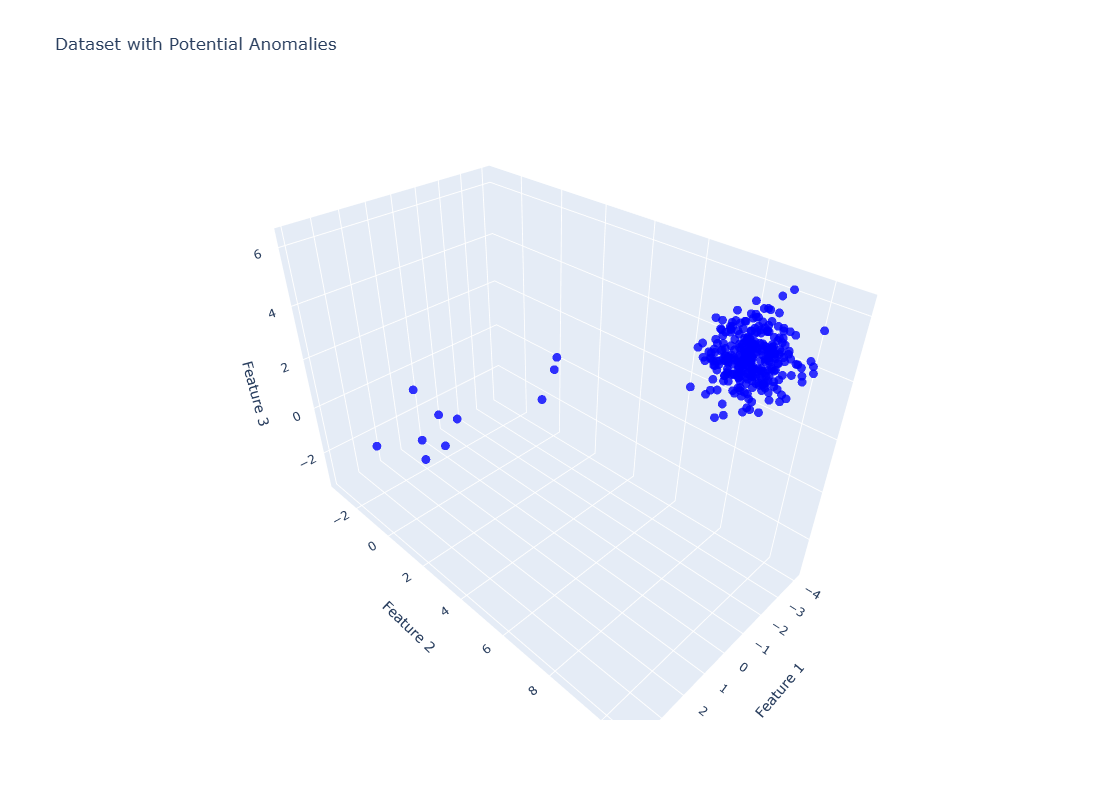

Anomaly threshold (distance to 5-th neighbor): 0.92


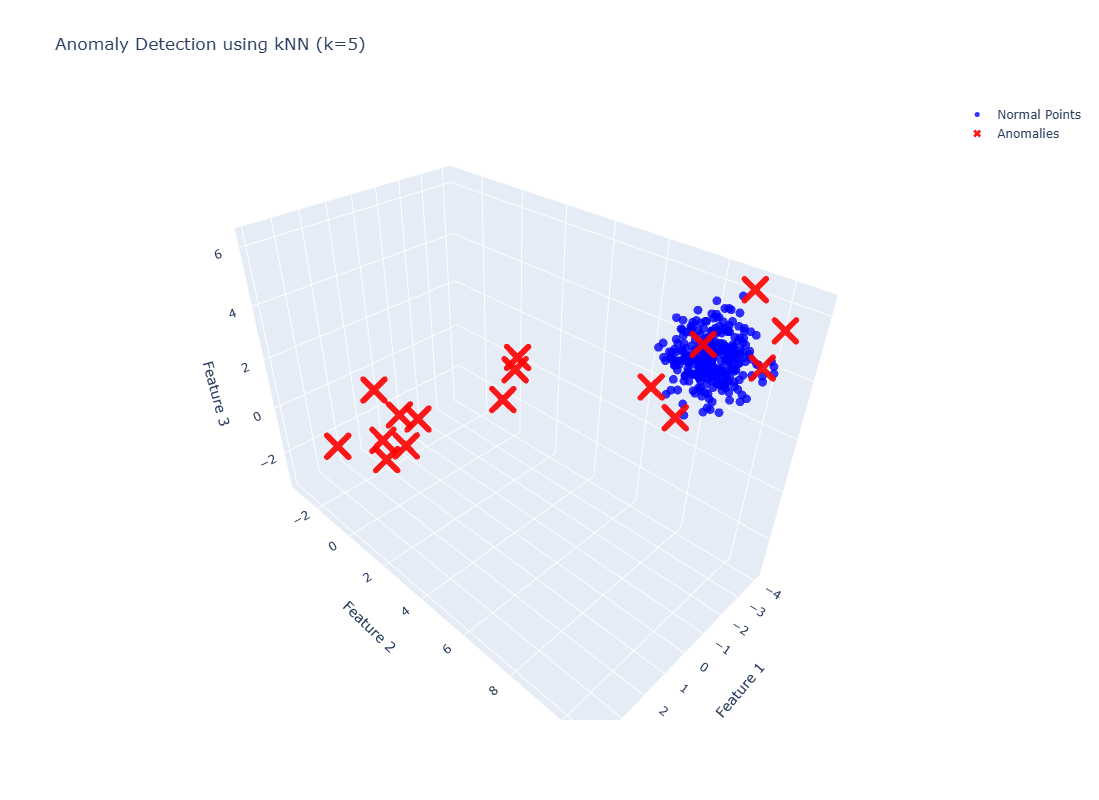

In [6]:
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

def generate_3d_data(n_samples=300, n_anomalies=10, cluster_std=0.60, random_state=42):
    """Generate synthetic 3D data with some anomalies."""
    # Create clustered data in 3D
    X, _ = make_blobs(n_samples=n_samples, centers=1, cluster_std=cluster_std, n_features=3, random_state=random_state)
    # Add random anomalies
    anomalies = np.random.uniform(low=-4, high=4, size=(n_anomalies, 3))
    # Combine normal data and anomalies
    return np.vstack([X, anomalies])

def plot_3d_data(X, title="Dataset with Potential Anomalies"):
    """Plot the 3D dataset using Plotly with larger figure dimensions."""
    fig = go.Figure(data=go.Scatter3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        mode='markers',
        marker=dict(size=5, color='blue', opacity=0.8)
    ))
    fig.update_layout(
        title=title,
        width=1000,  # Set figure width
        height=800,  # Set figure height
        scene=dict(
            xaxis_title='Feature 1',
            yaxis_title='Feature 2',
            zaxis_title='Feature 3'
        )
    )
    fig.show()

def detect_anomalies_knn(X, n_neighbors=5, percentile=95):
    """Detect anomalies using k-Nearest Neighbors distance method."""
    # Fit kNN model
    nbrs = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs.fit(X)
    
    # Calculate distances to the k-th nearest neighbor
    distances, _ = nbrs.kneighbors(X)
    distance_to_kth_neighbor = distances[:, -1]
    
    # Determine the threshold for anomalies
    threshold = np.percentile(distance_to_kth_neighbor, percentile)
    
    # Identify anomalies
    anomalies = X[distance_to_kth_neighbor > threshold]
    
    return anomalies, threshold

def plot_3d_anomalies(X, anomalies, threshold, n_neighbors=5):
    """Plot the 3D dataset with anomalies highlighted using Plotly with larger figure dimensions."""
    # Plot normal points
    normal_points = X[~np.isin(X, anomalies).all(axis=1)]
    
    fig = go.Figure()
    
    # Add normal points
    fig.add_trace(go.Scatter3d(
        x=normal_points[:, 0], y=normal_points[:, 1], z=normal_points[:, 2],
        mode='markers',
        marker=dict(size=5, color='blue', opacity=0.8),
        name='Normal Points'
    ))
    
    # Add anomalies
    fig.add_trace(go.Scatter3d(
        x=anomalies[:, 0], y=anomalies[:, 1], z=anomalies[:, 2],
        mode='markers',
        marker=dict(size=7, color='red', symbol='x', opacity=0.9),
        name='Anomalies'
    ))
    
    fig.update_layout(
        title=f"Anomaly Detection using kNN (k={n_neighbors})",
        width=1000,  # Set figure width
        height=800,  # Set figure height
        scene=dict(
            xaxis_title='Feature 1',
            yaxis_title='Feature 2',
            zaxis_title='Feature 3'
        )
    )
    fig.show()

def main():
    # Parameters
    n_samples = 300
    n_anomalies = 10
    n_neighbors = 5
    cluster_std = 0.60
    percentile = 95
    
    # Generate and plot data
    X = generate_3d_data(n_samples=n_samples, n_anomalies=n_anomalies, cluster_std=cluster_std)
    plot_3d_data(X, title="Dataset with Potential Anomalies")
    
    # Detect anomalies
    anomalies, threshold = detect_anomalies_knn(X, n_neighbors=n_neighbors, percentile=percentile)
    print(f"Anomaly threshold (distance to {n_neighbors}-th neighbor): {threshold:.2f}")
    
    # Plot anomalies
    plot_3d_anomalies(X, anomalies, threshold, n_neighbors=n_neighbors)

if __name__ == "__main__":
    main()
